# Quantum Computing Demonstrations

*Andy Dolan*

This notebook will be used for demonstrations of how we can work with quantum computers via APIs. To better understand the principles behind what the circuits we build are actually doing, we'll also compute complementary matrix representations of circuits and observe how they alter the state of qubit probability vectors.

To begin, we'll import our libraries, the most important of which is [`qiskit`](https://qiskit.org/), IBM's API for building quantum computing applications and running them on real quantum hardware.

In [13]:
import numpy as np
import matplotlib as plt
%matplotlib inline
from IPython.display import Latex

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, Operator

# Gate Operations

First we create a simple state vector that represents a single qubit, and initialize it to the basis state $|0\rangle$

Recall that this state $|0\rangle$ corresponds to the probability vector $\begin{bmatrix}1\\0\end{bmatrix}$, meaning that the qubit has a 100% chance of being 0 when it is measured.

In [14]:
q = np.array([[1], [0]])
q

array([[1],
       [0]])

## Simple Gates

Below, we define the following 1 qubit gates:

* The identity gate $I = \begin{pmatrix}1&0\\0&1\end{pmatrix}$
* The Pauli-X gate (X/NOT) $X = \begin{pmatrix}0&1\\1&0\end{pmatrix}$
* The Hadamard gate $H = \frac{1}{\sqrt{2}}\begin{pmatrix}1&1\\1&-1\end{pmatrix}$

As well as the 2-qubit CNOT gate:
$$
CNOT =
\begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0
\end{pmatrix}
$$

In [15]:
# Gate definitions
i = np.array([[1, 0], [0, 1]])
x = np.array([[0, 1], [1, 0]])
h = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])
cnot = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

i, x, h, cnot

(array([[1, 0],
        [0, 1]]),
 array([[0, 1],
        [1, 0]]),
 array([[ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678]]),
 array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0]]))

We will also leverage `qiskit` to visualize simple circuits using these gates and their corresponding state vectors.

First, our state vector in Dirac notation and visualized on the Bloch sphere, as well as our circuit (with a gate of choice):

In [4]:
state = Statevector(q)
state.draw('latex')

<IPython.core.display.Latex object>

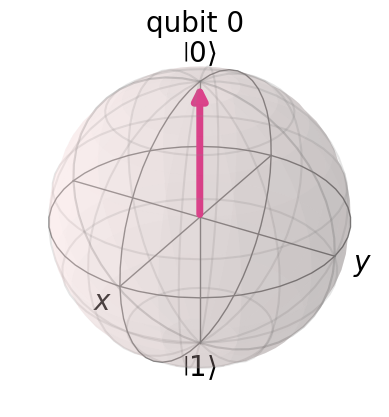

In [5]:
state.draw('bloch')

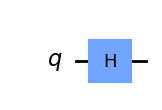

In [6]:
circuit = QuantumCircuit(1)

# circuit.i(0)
# circuit.x(0)
circuit.h(0)

circuit.draw('mpl')

Now we "evolve" the state by running the circuit and look at the state (note that we are not "measuring" the state, but simply computing what the state is expected to be):

In [7]:
state = state.evolve(circuit)
state.draw('latex')

<IPython.core.display.Latex object>

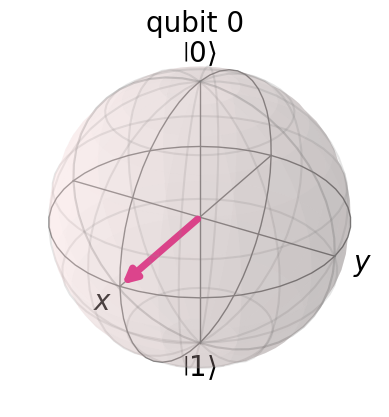

In [8]:
state.draw('bloch')

### Computing Hadamard Gate on Basis States

Let's run through the example math manually of applying the Hadamard gate to the basis state `|0>`:

$$
\begin{align}
|\psi\rangle &= H\begin{bmatrix}1\\0\end{bmatrix}\\
&= \frac{1}{\sqrt{2}}
\begin{pmatrix}
    1 & 1\\
    1 & -1
\end{pmatrix}
\begin{bmatrix}1\\0\end{bmatrix}\\
&=
\begin{bmatrix}
    \frac{1}{\sqrt{2}}\\
    \frac{1}{\sqrt{2}}
\end{bmatrix}
\end{align}
$$

In [9]:
q

array([[1],
       [0]])

In [10]:
(h @ q)

array([[0.70710678],
       [0.70710678]])

We can determine that the probabiliy of measuring each basis state is 50% by raising the state vector to the power of 2:

$$
P =
\begin{bmatrix}
    \frac{1}{\sqrt{2}}\\
    \frac{1}{\sqrt{2}}
\end{bmatrix}^2
=
\begin{bmatrix}
    \frac{1}{2}\\
    \frac{1}{2}
\end{bmatrix}
$$

Now we can do the same with Python:

In [11]:
(h @ q) ** 2

array([[0.5],
       [0.5]])

This indicates that the qubit is in a superposition, where a measurement will result in `|0>` half of the time, and `|1>` the other half.